# Métodos kernel para clasificación

### 1. Elige un conjunto de datos para clasificación binaria.

I am going to consider the dataset "Rain in Australia", which aims to predict wether the next day it will rain or not, based on some atmospheric measurements:

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/data

In [1]:
# Import basic libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
my_file = "weatherAUS.csv"
rain = pd.read_csv(my_file)

In [2]:
# Look at the available variables
for var in rain.columns:
    print(var)

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RISK_MM
RainTomorrow


In [3]:
# Transform the discrete variable from 'yes/no' to '1/0'
rain.RainTomorrow[rain.RainTomorrow == 'No'] = 0
rain.RainTomorrow[rain.RainTomorrow == 'Yes'] = 1

# Now, convert it into integer
rain.RainTomorrow = rain.RainTomorrow.astype(int)
rain.dtypes

/home/nicolo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nicolo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow       int64
dtype: object

In [4]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,0


In [5]:
# Many cities are available: maybe we can focus on just one of them
print(set(rain.Location))

brisbane = rain[rain.Location == "Brisbane"]
brisbane.head()

{'Sale', 'Witchcliffe', 'Williamtown', 'Cairns', 'BadgerysCreek', 'Woomera', 'Townsville', 'PerthAirport', 'NorahHead', 'Tuggeranong', 'Katherine', 'WaggaWagga', 'Ballarat', 'Darwin', 'Bendigo', 'Mildura', 'Portland', 'PearceRAAF', 'SydneyAirport', 'Walpole', 'NorfolkIsland', 'Watsonia', 'MountGinini', 'Nuriootpa', 'Wollongong', 'Canberra', 'Adelaide', 'AliceSprings', 'Perth', 'Uluru', 'Penrith', 'Albury', 'MelbourneAirport', 'Sydney', 'GoldCoast', 'Newcastle', 'Brisbane', 'Dartmoor', 'Launceston', 'Melbourne', 'Cobar', 'Richmond', 'SalmonGums', 'Moree', 'MountGambier', 'Albany', 'Nhil', 'CoffsHarbour', 'Hobart'}


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
81694,2008-07-01,Brisbane,10.3,25.2,0.0,1.4,9.5,WNW,26.0,SSW,...,37.0,1019.6,1014.8,0.0,1.0,14.9,24.6,No,0.0,0
81695,2008-07-02,Brisbane,8.1,22.9,0.0,2.0,9.8,W,30.0,W,...,30.0,1018.8,1015.0,0.0,0.0,16.2,22.4,No,0.0,0
81696,2008-07-03,Brisbane,9.7,22.4,0.0,5.8,9.4,E,22.0,SW,...,52.0,1021.4,1019.1,1.0,4.0,15.4,21.3,No,0.8,0
81697,2008-07-04,Brisbane,11.8,20.0,0.8,1.8,1.1,SW,24.0,SW,...,53.0,1023.5,1021.7,7.0,7.0,14.1,19.6,No,0.0,0
81698,2008-07-05,Brisbane,12.3,16.7,0.0,2.0,0.3,S,37.0,S,...,89.0,1027.3,1026.2,7.0,8.0,16.1,15.0,No,16.2,1


In [6]:
# Evaporation and Sunshine are empty: let's remove them
# I shall remove also categorical variables, like the wind direction
# I know the location, so I can remove it, and I am not interested in the date
droplist = ["Evaporation", "Sunshine", "WindGustDir", "WindDir9am", "WindDir3pm", "Location", "Date", "RainToday", "RISK_MM"]
brisbane_slim = brisbane.drop(droplist, axis = 1)

brisbane_slim.dropna(how='any', inplace = True)
len(brisbane_slim)

3106

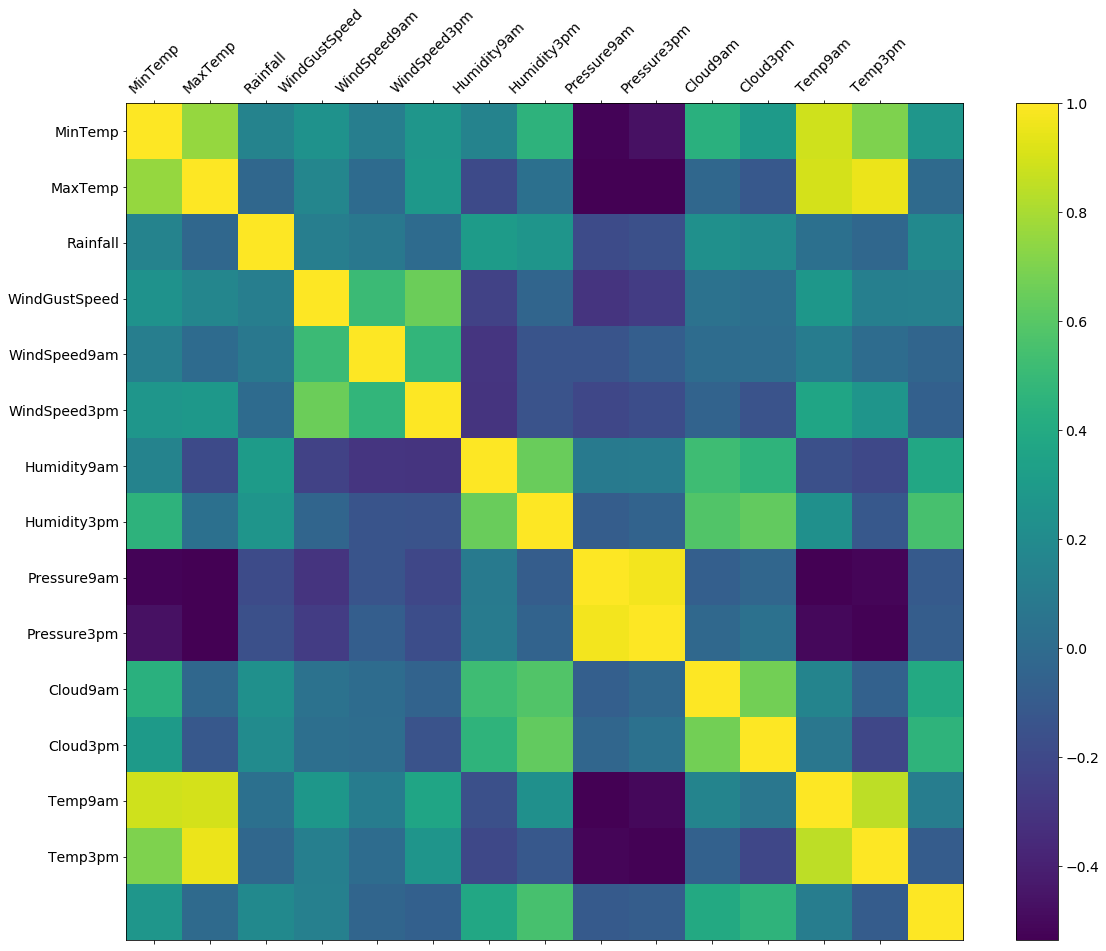

In [7]:
# Check the correlation among variables,
# to see if it is possible to remove some of them
# (https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas)

f = plt.figure(figsize=(19, 15))
plt.matshow(brisbane_slim.corr(), fignum=f.number)
plt.xticks(range(brisbane_slim.shape[1] - 1), brisbane_slim.columns, fontsize=14, rotation=45)
plt.yticks(range(brisbane_slim.shape[1] - 1), brisbane_slim.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

The correlation is high between some of the variables:
- MinTemp - Temp9am
- MaxTemp - Temp3pm
- Pressure9am - Pressure3pm

Additionally, some of them are discrete
- Cloud9am;
- Cloud3pm.

I remove the highly correlated variables and the discrete ones, to make the model simpler.

In [8]:
droplist2 = ["Temp9am", "Temp3pm", "Pressure3pm", "Cloud9am", "Cloud3pm"]
brisbane_slim = brisbane_slim.drop(droplist2, axis = 1)

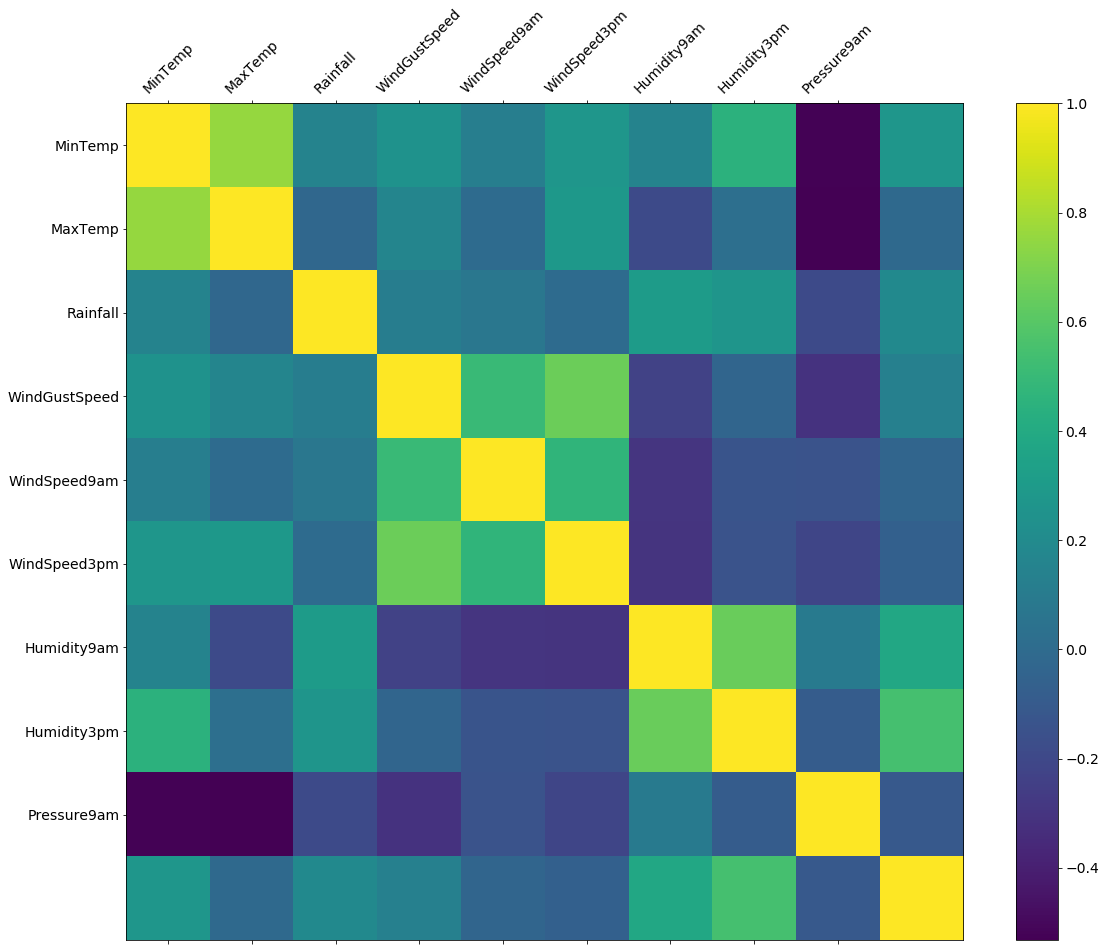

In [9]:
# Check again the correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(brisbane_slim.corr(), fignum=f.number)
plt.xticks(range(brisbane_slim.shape[1] - 1), brisbane_slim.columns, fontsize=14, rotation=45)
plt.yticks(range(brisbane_slim.shape[1] - 1), brisbane_slim.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [10]:
brisbane_slim.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainTomorrow
81694,10.3,25.2,0.0,26.0,6.0,15.0,81.0,37.0,1019.6,0
81695,8.1,22.9,0.0,30.0,15.0,19.0,41.0,30.0,1018.8,0
81696,9.7,22.4,0.0,22.0,7.0,15.0,55.0,52.0,1021.4,0
81697,11.8,20.0,0.8,24.0,9.0,7.0,76.0,53.0,1023.5,0
81698,12.3,16.7,0.0,37.0,11.0,7.0,81.0,89.0,1027.3,1


### 2. Visualiza (algunos de) los datos.

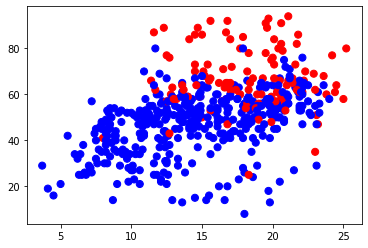

In [11]:
# 2D visualization of a pair of variables:
# MinTemp vs Humidity3pm
nEvents = 500
if nEvents > brisbane_slim.shape[0]: 
    nEvents = brisbane_slim.shape[0]

plt.scatter(brisbane_slim.iloc[0:nEvents, 0], 
            brisbane_slim.iloc[0:nEvents, 7], 
            c=brisbane_slim.iloc[0:nEvents, -1], 
            s=50, 
            cmap='bwr');

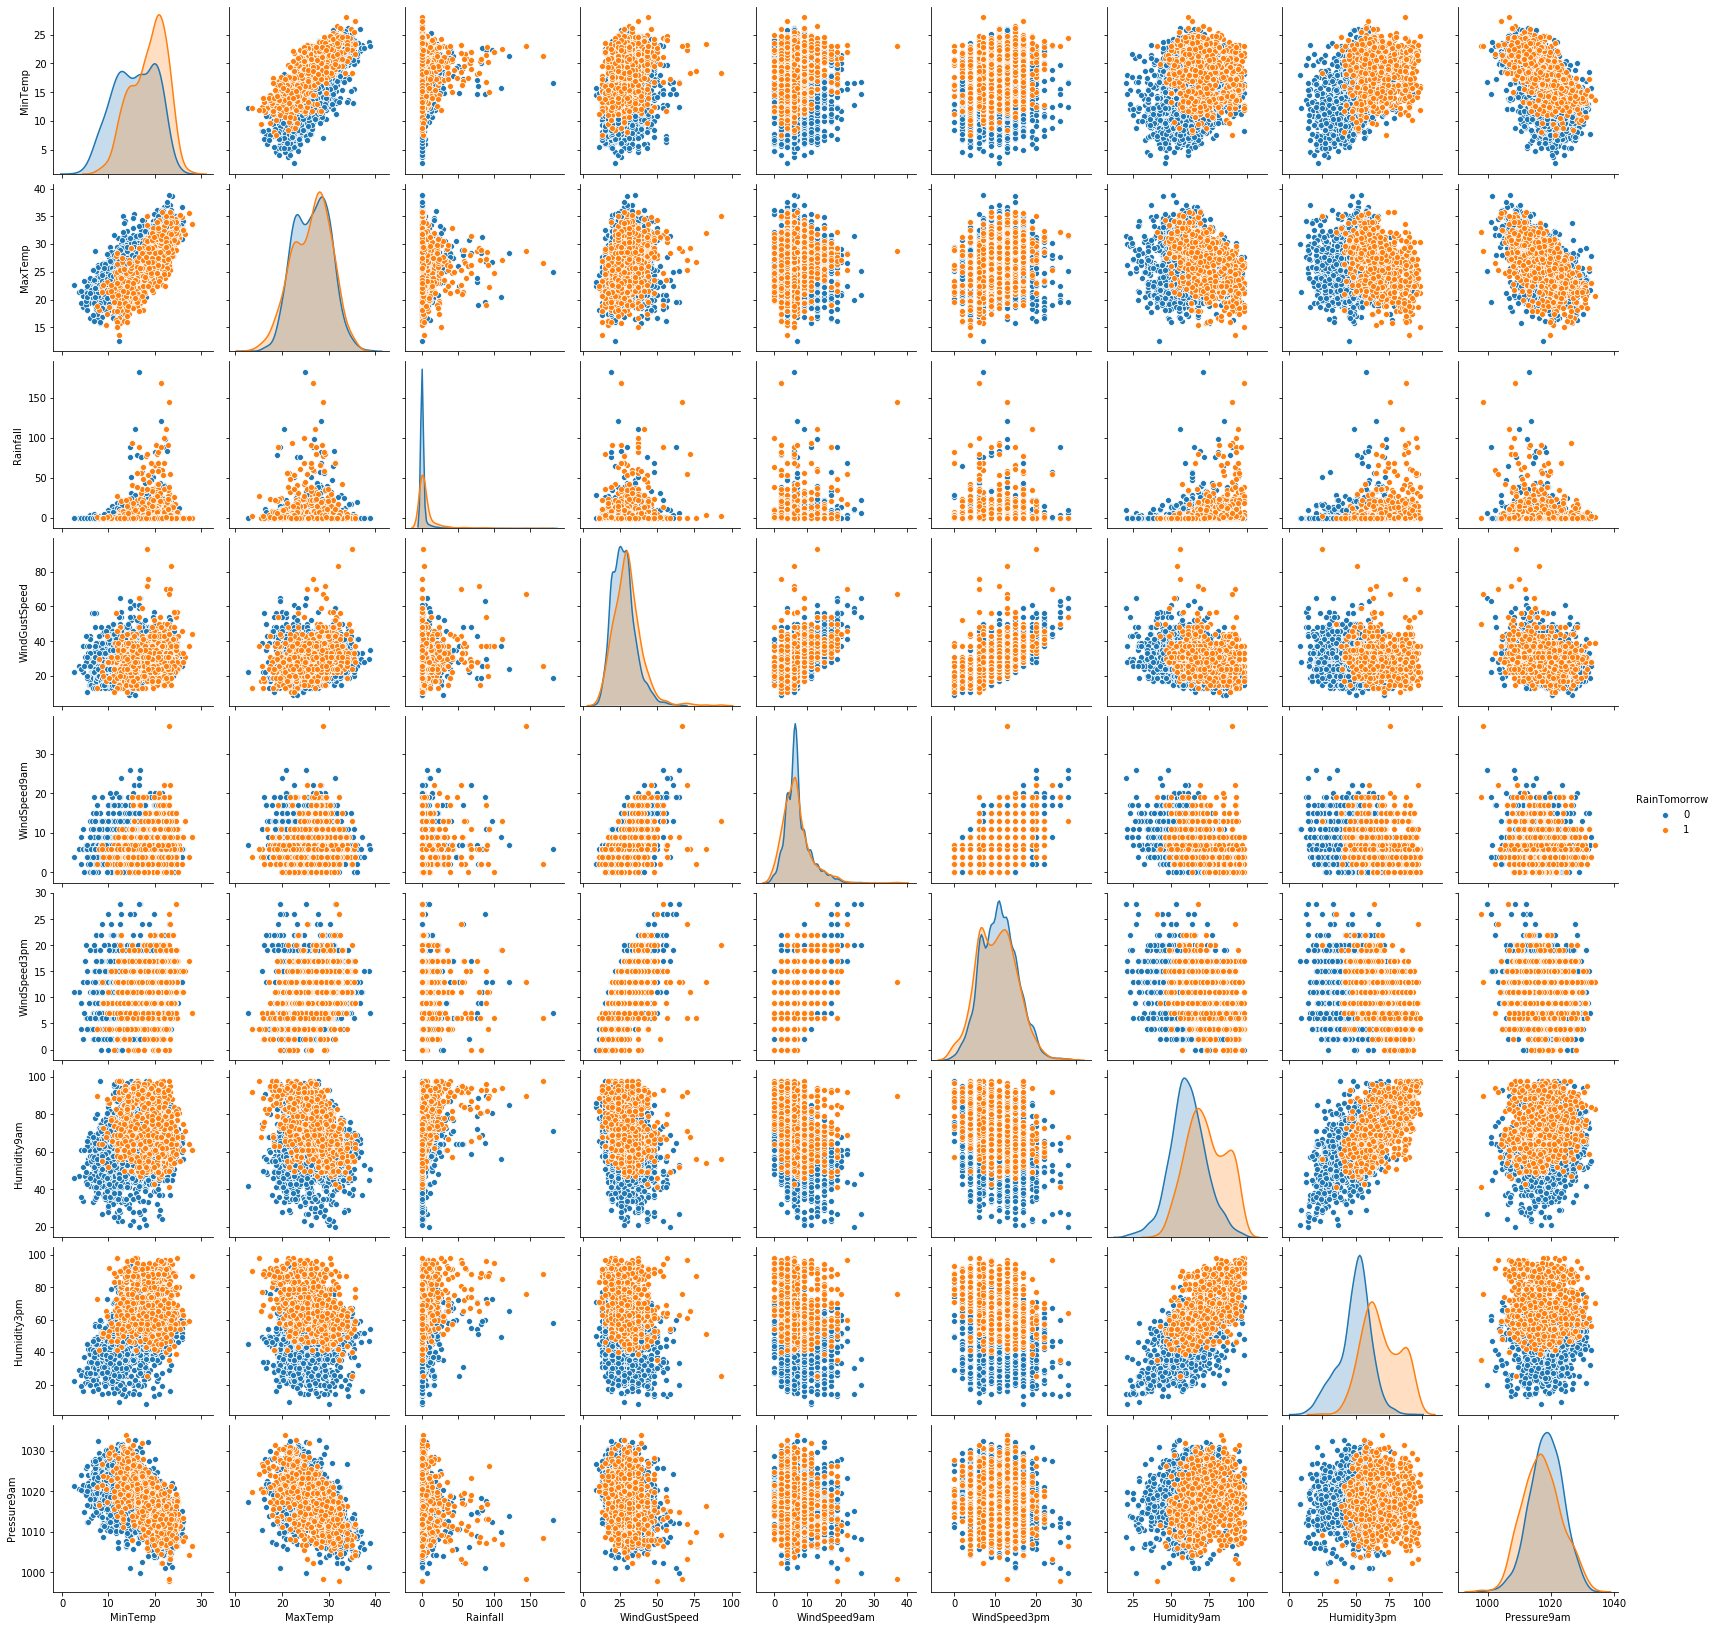

In [12]:
# Plot all the variables pairs, one by one
import seaborn as sns
sns.pairplot(brisbane_slim, hue = 'RainTomorrow')

### Now let's try some more fancy 3D visualization

In [13]:
# load Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

# initiate the Plotly Notebook mode
init_notebook_mode(connected=True)

In [14]:
# define a function for 3D plotting using Plotly
def plot_3D(X, y):
    
    # retrieve indices of zeroes and ones
    idx0 = y==0
    idx1 = y==1
    
    # define data set 1 plot options
    X0 = X[idx0]
    trace0 = go.Scatter3d(x=X0.iloc[:,0], y=X0.iloc[:,1], z=X0.iloc[:,2],
        mode='markers',
        marker=dict(size=6, color='blue', opacity=0.8)
    )

    # define data set 2 plot options
    X1 = X[idx1]
    trace1 = go.Scatter3d(x=X1.iloc[:,0], y=X1.iloc[:,1], z=X1.iloc[:,2],
        mode='markers',
        marker=dict(size=6, color='red', opacity=0.8)
    )

    # set aspect ratio
    scene = dict(aspectmode="manual", aspectratio=dict(x=1, y=1, z=1))

    # define figure properties
    layout = go.Layout(
        scene=scene,
        height=600,
        width=900
    )

    # produce the plot
    fig = go.Figure(data=[trace0,trace1],layout=layout)
    iplot(fig)

In [15]:
# plot the data in 3D

nEvents = 500
if nEvents > brisbane_slim.shape[0]: 
    nEvents = brisbane_slim.shape[0]

# I'm plotting 3 variables at the same time:
# 0: MinTemp
# 6: Humidity9am 
# 7: Hummidity3pm

Phi = brisbane_slim.iloc[0:nEvents,[0,6,7]]

y = brisbane_slim.iloc[0:nEvents, -1]

plot_3D(Phi,y)

### 3. Separa los datos en un conjunto de training y otro de test.

In [16]:
# To avoid large triaing time, I keep just 1000 events.
# Let's create the training and test subsets by taking this into account

from sklearn.model_selection import train_test_split

# I consider, in total, only 1000 events
brisbane_1000 = brisbane_slim[0:1000]

# test sample gets 20% of the total events (in this case, 200)
test_size = 0.2

# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(
    brisbane_1000.iloc[:,0:-1], brisbane_1000.iloc[:,-1], test_size=test_size, random_state=0)

### 4. Entrena una SVM sobre los datos de training. Busca los parámetros óptimos usando GridSearchCV.

In [40]:
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from time import time

# Define the grid
param_grid = {'C': [1, 1E1, 1E2, 5E2, 1E3, 5E3],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], 
              'kernel': ['rbf', 'linear'],}

t0 = time()

grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

Elapsed time: 28.892s
Best estimator found by grid search:
{'C': 10.0, 'gamma': 0.0001, 'kernel': 'linear'}


### 5. Prueba el clasificador sobre los datos de test y reporta el resultado.

In [41]:
# Evaluate the prediction of the SVM
y_pred = clf.predict(X_test)

In [42]:
# Print a summary of the performance
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       145
           1       0.76      0.64      0.69        55

    accuracy                           0.84       200
   macro avg       0.82      0.78      0.79       200
weighted avg       0.84      0.84      0.84       200



In [43]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[134  11]
 [ 20  35]]


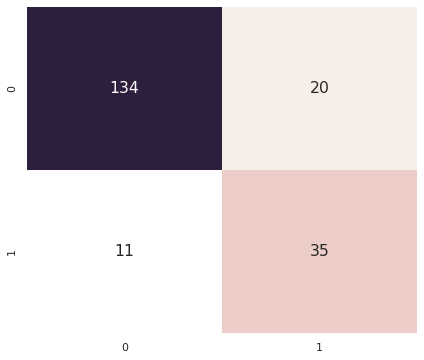

In [44]:
# Confusion matrix, but slightly nicer
from sklearn.metrics import confusion_matrix

# use seaborn plotting defaults
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,6))

sns.set(font_scale=1.3)
sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False,
            xticklabels=set(y_pred),
            yticklabels=set(y_pred),
            cmap=sns.cubehelix_palette(light=1, as_cmap=True))
